In [12]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn
import sklearn.metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [14]:
#building all kinds of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score, roc_auc_score, average_precision_score, precision_recall_curve
from sklearn.metrics import roc_curve,auc, roc_auc_score, average_precision_score
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix

In [16]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from xgboost import XGBClassifier
from math import sqrt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [18]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [1]:
import pandas as pd

url2 = 'Dataset/PRFI_4M_DEF_HEAD.txt'
df = pd.read_table(url2, sep=';')
df.head(10)

,ID_OPER,DT_OP_GMT,ORA_OP_GMT,COD_CANA,COD_CABC,COD_ESITO,PROCESSING_COD,IMP_TRZ_RECON,FL_AUTORIZZAZIONE,COD_ABC_PAES,...,PERC_ESITO_ALL_G,PERC_ESITO_ALL_M,DEV_MEDIA_AUT_SEC_4,DEV_MEDIA_AUT_TO_SEC_4,MEDIA_NON_AUT_SEC_4,MEDIA_NON_AUT_SEC_3,MEDIA_NON_AUT_SEC_2,TIME_NON_AUT_SEC_LAST,ANNO,MESE
0,6231261973,2016-03-14,11:27:28,ATM,6011,0,366100,0.00,T,ITA,...,0.0,0.000000,-1.000000,-1.000000,3433466.75,3.764000e+03,5644.5,4498501,2016,3
1,6217512045,2016-03-09,09:48:09,INT,5942,0,6300,9.35,T,ITA,...,0.0,0.000000,2.418578,1.092245,1375101.00,1.411049e+06,2070957.5,423982,2016,3
2,6204998318,2016-03-04,12:01:47,INT,5192,0,6300,17.90,T,ITA,...,0.0,0.000000,0.864804,2.990299,1375101.00,1.411049e+06,2070957.5,685390,2016,3
3,6260986375,2016-03-25,08:29:03,INT,5968,0,6300,9.99,T,NLD,...,0.0,0.000000,-0.279195,-0.279195,1375101.00,1.411049e+06,2070957.5,1377654,2016,3
4,6214969493,2016-03-08,10:36:09,POS,5411,0,0,22.25,T,ITA,...,0.0,0.000000,0.306757,-0.103120,1964559.50,2.573075e+06,3425734.0,136317,2016,3
5,6222279626,2016-03-10,18:57:56,INT,5812,0,6300,15.00,T,ITA,...,0.5,0.200000,8.763520,-0.181150,2709691.25,3.323669e+06,3232752.5,198,2016,3
6,6209338514,2016-03-05,19:18:48,POS,5411,0,0,13.52,T,ITA,...,0.0,0.000000,-0.738304,0.004347,1964559.50,2.573075e+06,3425734.0,428372,2016,3
7,6233723975,2016-03-15,09:55:14,POS,5411,0,0,9.58,T,ITA,...,0.0,0.142857,-0.178569,4.505311,2709691.25,3.323669e+06,3232752.5,172354,2016,3
8,6242790879,2016-03-18,12:49:39,POS,5411,0,0,4.64,T,ITA,...,0.0,0.125000,-0.441580,2.286535,2709691.25,3.323669e+06,3232752.5,269665,2016,3
9,6221082423,2016-03-10,13:00:27,POS,5812,0,0,5.50,T,ITA,...,0.0,0.000000,-0.060605,-0.173550,1964559.50,2.573075e+06,3425734.0,181458,2016,3


In [7]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- ID_OPER ---
6333399040    1
6365287784    1
6245702090    1
6219615315    1
6237108555    1
             ..
6400932371    1
6488952292    1
6484768227    1
6354746850    1
6328973489    1
Name: ID_OPER, Length: 5442906, dtype: int64
---- DT_OP_GMT ---
2016-03-01    77129
2016-03-26    69256
2016-03-25    68933
2016-04-01    65935
2016-03-02    65231
              ...  
2016-03-27    21814
2016-06-26    20717
2016-06-19    19880
2016-06-12    19829
2016-06-05    18804
Name: DT_OP_GMT, Length: 122, dtype: int64
---- ORA_OP_GMT ---
09:36:51    182
09:39:39    179
10:08:17    179
09:30:02    177
09:58:47    176
           ... 
01:07:15      1
02:44:15      1
02:46:53      1
03:17:50      1
03:13:55      1
Name: ORA_OP_GMT, Length: 86061, dtype: int64
---- COD_CANA ---
POS    2206288
ATM    2082682
INT     995964
I3D      94708
VPO      29938
PPI      15648
APP       8248
PDP       3928
BPO       3012
PTM       2369
MBP        119
BPI          2
Name: COD_CANA, dtype: int64
---- COD_CA

In [36]:
df['FLAG_FRODE'].value_counts()['F']

5395244

In [ ]:
df['FLAG_FRODE'].value_counts()['T']

Trasformiamo i valori True in 1 e False in 0

In [37]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

df["FLAG_FRODE"].replace({"T": 1, "F": 0}, inplace=True)

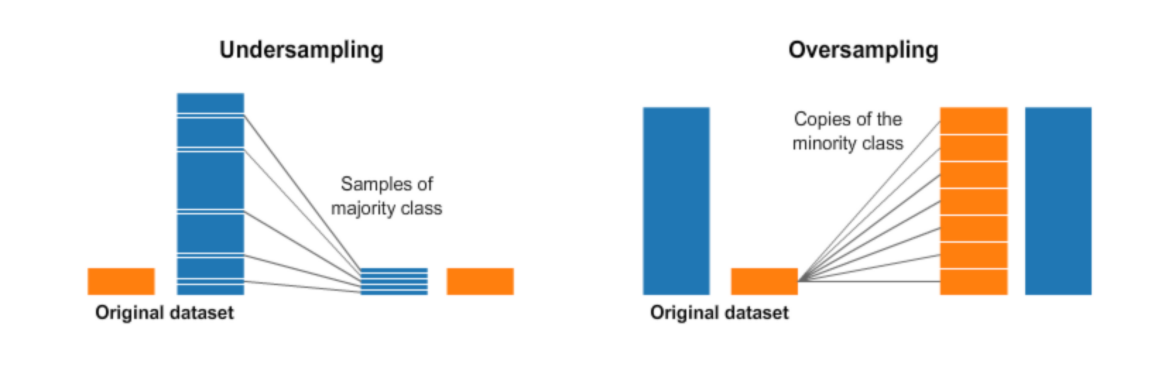

### UNDERSAMPLING

Useremo le transazioni dal 2016/03/01 al 2016/05/31 per il training set, e dal 2016/06/15 al 2016/06/30 per il test set. Applicheremo l'Undersample al dataset di training e testeremo il modello sul test set sbilanciato.

In [38]:

df["DT_OP_GMT"] = pd.to_datetime(df["DT_OP_GMT"])

start_datetr = '2016-03-01 00:00:00'
end_datetr = '2016-05-31 00:00:00'
start_datets = '2016-06-07 00:00:00'
end_datets = '2016-06-30 00:00:00'

mask_tr = (df['DT_OP_GMT'] >= start_datetr) & (df['DT_OP_GMT'] <= end_datetr)
df_train = df.loc[mask_tr]
print(df_train)

#greater than the start date and smaller than the end date
mask = (df['DT_OP_GMT'] > start_datets) & (df['DT_OP_GMT'] <= end_datets)
df_test = df.loc[mask]
print(df_test)

            ID_OPER  DT_OP_GMT ORA_OP_GMT COD_CANA  COD_CABC  COD_ESITO  \
0        6231261973 2016-03-14   11:27:28      ATM      6011          0   
1        6217512045 2016-03-09   09:48:09      INT      5942          0   
2        6204998318 2016-03-04   12:01:47      INT      5192          0   
3        6260986375 2016-03-25   08:29:03      INT      5968          0   
4        6214969493 2016-03-08   10:36:09      POS      5411          0   
...             ...        ...        ...      ...       ...        ...   
5439283  6442463929 2016-05-30   17:44:10      INT      8999          0   
5439284  6444178850 2016-05-31   09:31:42      INT      4899          0   
5439406  6442771077 2016-05-30   16:54:51      ATM      6011          0   
5439440  6445306054 2016-05-31   15:37:36      INT      7273          0   
5439830  6396976594 2016-05-13   17:07:03      ATM      6011          0   

         PROCESSING_COD  IMP_TRZ_RECON FL_AUTORIZZAZIONE COD_ABC_PAES  ...  \
0                3661

In [39]:
df_train['FLAG_FRODE'].value_counts()[1]

38613

In [40]:
df_train['FLAG_FRODE'].value_counts()[0]

4466614

In [41]:
df_test['FLAG_FRODE'].value_counts()[1]

6919

In [42]:
df_test['FLAG_FRODE'].value_counts()[0]

707704

In [43]:
df_train.columns

Index(['ID_OPER', 'DT_OP_GMT', 'ORA_OP_GMT', 'COD_CANA', 'COD_CABC',
       'COD_ESITO', 'PROCESSING_COD', 'IMP_TRZ_RECON', 'FL_AUTORIZZAZIONE',
       'COD_ABC_PAES', 'ID_TIPO_CARTA', 'ID_CARTA', 'TIPO_INPUT_MODE',
       'COD_CIRC', 'FLAG_FRODE', 'TRX_TYPE', 'Row_Num', 'TIME_ORA_OP',
       'DEV_MEDIA_IMP_TC_1M', 'DEV_MEDIA_IMP_TC_3M', 'DEV_MEDIA_IMP_TC_6M',
       'DEV_MEDIA_IMP_TC_9M', 'DEV_MEDIA_IMP_TC_12M',
       'PERC_RISK_CIRC_TC_TO_1M', 'PERC_RISK_CIRC_TC_TO_3M',
       'PERC_RISK_CIRC_TC_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_MCC_1M', 'PERC_RISK_MCC_3M',
       'PERC_RISK_MCC_6M', 'PERC_RISK_PAESE_MCC_IM_1M',
       'PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M',
       'DEV_MEDIA_IMP_1M', 'DEV_MEDIA_IMP_3M', 'DEV_MEDIA_IMP_6M',
       'DEV_MEDIA_IMP_9M', 'DEV_MEDIA_IMP_12M', 'FLAG_IMP_P

In [44]:
# Number of data points in the minority class
df_train = df_train.reset_index()
number_records_fraud = len(df_train[df_train.FLAG_FRODE == 1])
fraud_indices = np.array(df_train[df_train.FLAG_FRODE == 1].index)

In [45]:
# Picking the indices of the normal classes
normal_indices = df_train[df_train.FLAG_FRODE == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dfset
df_train_undersample = df_train.iloc[under_sample_indices,:]

#X_undersample = under_sample_df.loc[:, under_sample_df.columns != 'FLAG_FRODE']
#y_undersample = under_sample_df.loc[:, under_sample_df.columns == 'FLAG_FRODE']

Distribution of the Classes in the dataset
0    0.5
1    0.5
Name: FLAG_FRODE, dtype: float64


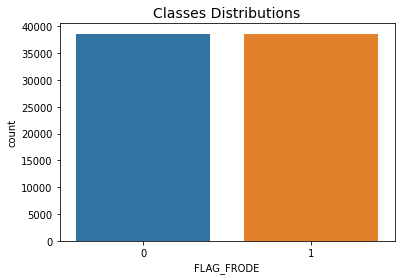

In [46]:
print('Distribution of the Classes in the dataset')
print(df_train_undersample['FLAG_FRODE'].value_counts()/len(df_train_undersample))

sns.countplot('FLAG_FRODE', data=df_train_undersample)
plt.title('Classes Distributions', fontsize=14)
plt.show()

In [47]:
xTrain = df_train_undersample[['COD_ESITO', 'PROCESSING_COD', 'IMP_TRZ_RECON',
        'ID_TIPO_CARTA', 'ID_CARTA', 'Row_Num', 'TIME_ORA_OP',
       'DEV_MEDIA_IMP_TC_1M', 'DEV_MEDIA_IMP_TC_3M', 'DEV_MEDIA_IMP_TC_6M',
       'DEV_MEDIA_IMP_TC_9M', 'DEV_MEDIA_IMP_TC_12M',
       'PERC_RISK_CIRC_TC_TO_1M', 'PERC_RISK_CIRC_TC_TO_3M',
       'PERC_RISK_CIRC_TC_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_MCC_1M', 'PERC_RISK_MCC_3M',
       'PERC_RISK_MCC_6M', 'PERC_RISK_PAESE_MCC_IM_1M',
       'PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M',
       'DEV_MEDIA_IMP_1M', 'DEV_MEDIA_IMP_3M', 'DEV_MEDIA_IMP_6M',
       'DEV_MEDIA_IMP_9M', 'DEV_MEDIA_IMP_12M', 'FLAG_IMP_PREC_0',
       'FLAG_IMP_PREC_0_AUTOR', 'DEV_IMP_MEDIA_ULTIME_3',
       'DEV_IMP_MEDIA_ULTIME_5', 'TREND_3_5', 'DEV_IMP_MEDIO_TRX_PREC',
       'DEV_IMP_MEDIO_TRX_PREC_MESE', 'DEV_IMP_MEDIO_TRX_PREC_GIORNO',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_CAN_3M', 'DEV_MEDIA_IMP_CAN_6M',
       'DEV_MEDIA_IMP_CAN_9M', 'DEV_MEDIA_IMP_CAN_12M', 'DEV_MEDIA_IMP_TO_1M',
       'DEV_MEDIA_IMP_TO_3M', 'DEV_MEDIA_IMP_TO_6M', 'DEV_MEDIA_IMP_TO_9M',
       'DEV_MEDIA_IMP_TO_12M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'PERC_OPER_NON_AUTOR_M',
       'PERC_OPER_NON_AUTOR_G', 'PERC_VAR_NON_AUTOR_G_1M',
       'PERC_VAR_NON_AUTOR_G_2M', 'PERC_VAR_NON_AUTOR_M_1M',
       'PERC_VAR_NON_AUTOR_M_2M', 'FLAG_CAMBIO_INPUT', 'FLAG_CAMBIO_PAESE_AUT',
       'FLAG_CAMBIO_PAESE_NON_AUT', 'FLAG_CAMBIO_PAESE_AUT_IMP_0',
       'FLAG_CAMBIO_PAESE_NON_AUT_IMP_0', 'PERC_ESITO_NSF_G',
       'PERC_ESITO_NSF_M', 'PERC_ESITO_CV2_G', 'PERC_ESITO_CV2_M',
       'PERC_ESITO_PIN_G', 'PERC_ESITO_PIN_M', 'PERC_ESITO_SCUDO_G',
       'PERC_ESITO_SCUDO_M', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_DT_SCAD_M',
       'PERC_ESITO_ALTRO_G', 'PERC_ESITO_ALTRO_M', 'PERC_ESITO_ALL_G',
       'PERC_ESITO_ALL_M', 'DEV_MEDIA_AUT_SEC_4', 'DEV_MEDIA_AUT_TO_SEC_4',
       'MEDIA_NON_AUT_SEC_4', 'MEDIA_NON_AUT_SEC_3', 'MEDIA_NON_AUT_SEC_2',
       'TIME_NON_AUT_SEC_LAST']]

xTest = df_test[['COD_ESITO', 'PROCESSING_COD', 'IMP_TRZ_RECON', 'ID_TIPO_CARTA', 'ID_CARTA', 'Row_Num', 'TIME_ORA_OP',
       'DEV_MEDIA_IMP_TC_1M', 'DEV_MEDIA_IMP_TC_3M', 'DEV_MEDIA_IMP_TC_6M',
       'DEV_MEDIA_IMP_TC_9M', 'DEV_MEDIA_IMP_TC_12M',
       'PERC_RISK_CIRC_TC_TO_1M', 'PERC_RISK_CIRC_TC_TO_3M',
       'PERC_RISK_CIRC_TC_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_MCC_1M', 'PERC_RISK_MCC_3M',
       'PERC_RISK_MCC_6M', 'PERC_RISK_PAESE_MCC_IM_1M',
       'PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M',
       'DEV_MEDIA_IMP_1M', 'DEV_MEDIA_IMP_3M', 'DEV_MEDIA_IMP_6M',
       'DEV_MEDIA_IMP_9M', 'DEV_MEDIA_IMP_12M', 'FLAG_IMP_PREC_0',
       'FLAG_IMP_PREC_0_AUTOR', 'DEV_IMP_MEDIA_ULTIME_3',
       'DEV_IMP_MEDIA_ULTIME_5', 'TREND_3_5', 'DEV_IMP_MEDIO_TRX_PREC',
       'DEV_IMP_MEDIO_TRX_PREC_MESE', 'DEV_IMP_MEDIO_TRX_PREC_GIORNO',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_CAN_3M', 'DEV_MEDIA_IMP_CAN_6M',
       'DEV_MEDIA_IMP_CAN_9M', 'DEV_MEDIA_IMP_CAN_12M', 'DEV_MEDIA_IMP_TO_1M',
       'DEV_MEDIA_IMP_TO_3M', 'DEV_MEDIA_IMP_TO_6M', 'DEV_MEDIA_IMP_TO_9M',
       'DEV_MEDIA_IMP_TO_12M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'PERC_OPER_NON_AUTOR_M',
       'PERC_OPER_NON_AUTOR_G', 'PERC_VAR_NON_AUTOR_G_1M',
       'PERC_VAR_NON_AUTOR_G_2M', 'PERC_VAR_NON_AUTOR_M_1M',
       'PERC_VAR_NON_AUTOR_M_2M', 'FLAG_CAMBIO_INPUT', 'FLAG_CAMBIO_PAESE_AUT',
       'FLAG_CAMBIO_PAESE_NON_AUT', 'FLAG_CAMBIO_PAESE_AUT_IMP_0',
       'FLAG_CAMBIO_PAESE_NON_AUT_IMP_0', 'PERC_ESITO_NSF_G',
       'PERC_ESITO_NSF_M', 'PERC_ESITO_CV2_G', 'PERC_ESITO_CV2_M',
       'PERC_ESITO_PIN_G', 'PERC_ESITO_PIN_M', 'PERC_ESITO_SCUDO_G',
       'PERC_ESITO_SCUDO_M', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_DT_SCAD_M',
       'PERC_ESITO_ALTRO_G', 'PERC_ESITO_ALTRO_M', 'PERC_ESITO_ALL_G',
       'PERC_ESITO_ALL_M', 'DEV_MEDIA_AUT_SEC_4', 'DEV_MEDIA_AUT_TO_SEC_4',
       'MEDIA_NON_AUT_SEC_4', 'MEDIA_NON_AUT_SEC_3', 'MEDIA_NON_AUT_SEC_2',
       'TIME_NON_AUT_SEC_LAST']]

yTrain = df_train_undersample["FLAG_FRODE"]

yTest = df_test["FLAG_FRODE"]

In [20]:
xTrain

,COD_ESITO,PROCESSING_COD,IMP_TRZ_RECON,ID_TIPO_CARTA,ID_CARTA,Row_Num,TIME_ORA_OP,DEV_MEDIA_IMP_TC_1M,DEV_MEDIA_IMP_TC_3M,DEV_MEDIA_IMP_TC_6M,...,PERC_ESITO_ALTRO_G,PERC_ESITO_ALTRO_M,PERC_ESITO_ALL_G,PERC_ESITO_ALL_M,DEV_MEDIA_AUT_SEC_4,DEV_MEDIA_AUT_TO_SEC_4,MEDIA_NON_AUT_SEC_4,MEDIA_NON_AUT_SEC_3,MEDIA_NON_AUT_SEC_2,TIME_NON_AUT_SEC_LAST
36,60,360000,0.00,1009,20704710,24,9,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,1440090
38,0,0,13.42,1028,22517375,9,16,2.272125,2.324215,2.462080,...,0.0,0.0,0.0,0.0,0.061449,0.000000,0.0,0.0,0.0,2503645
60,0,6300,1.00,1028,25589977,8,19,42.911917,43.610961,45.461109,...,0.0,0.0,0.0,0.0,2.039607,2.104925,0.0,0.0,0.0,1677275
101,0,116300,100.00,1028,25821608,4,1,-0.560881,-0.553890,-0.535389,...,0.0,0.0,0.0,0.0,2052.826531,2052.826531,0.0,0.0,0.0,49
102,0,116300,100.00,1028,25821608,3,1,-0.560881,-0.553890,-0.535389,...,0.0,0.0,0.0,0.0,1057.342105,1057.342105,0.0,0.0,0.0,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920278,0,6300,145.11,1028,58352731,17,21,-0.697389,-0.692571,-0.679821,...,0.0,0.0,0.0,0.0,0.784283,0.784283,0.0,0.0,0.0,468181
950330,0,0,128.00,1017,43614734,55,7,0.120617,0.129715,0.168722,...,0.0,0.0,0.0,0.0,-0.624327,-1.000000,24.0,24.0,24.0,516632
2715371,0,16100,50.00,1085,57123884,67,21,0.730625,0.745972,0.768388,...,0.0,0.0,0.0,0.0,-0.044010,0.000000,0.0,0.0,0.0,181563
2074647,0,0,20.88,1017,52966913,150,18,5.977772,6.339655,6.167398,...,0.0,0.0,0.0,0.0,0.209390,1.024715,0.0,0.0,0.0,106543


Inoltre le metriche più utilizzate in questi casi di dataset imbalance che variano molto in base al numero dei falsi negativi sono:

1. Recall è anche chiamata sensitivity o true positive rate: indica il rapporto di istanze positive correttamente individuate dal sistema di machine learning e si misua come TP / (TP + FN).
2. F1 Score che tiene conto della Precision and Recall, che si misura come TP / (TP + (FN+FP/2)) che è anche uguale a 2 * (Precision * Recall) / (Precision + Recall).
3. Negative predictive value (NPV) che si misura come TN / (TN + FN).

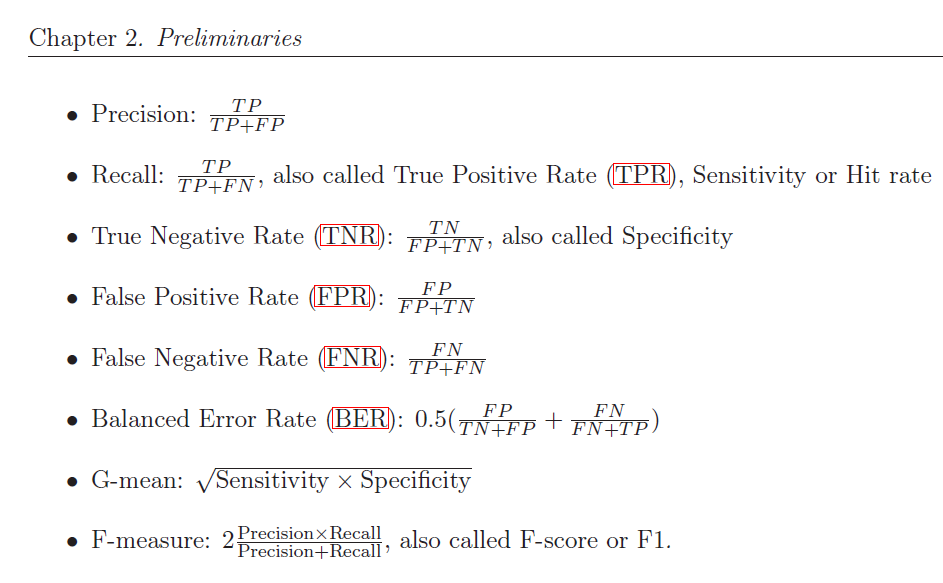

Setting Hyperparameters

In [37]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#logistic regression model creation 
lr = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, scoring='roc_auc',error_score=0)

In [41]:
# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)
grid_search.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [29]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [80]:
lr = LogisticRegression(random_state = 0, solver = 'liblinear', 
                        C= 1.0, penalty = 'l2',n_jobs = -1)
lr.fit(xTrain,yTrain)
predictions_lr = lr.predict(xTest)
print(confusion_matrix(yTest, predictions_lr))

c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1357: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[[394845 312859]
 [  2187   4732]]


In [81]:
import numpy as np
cm_lr = confusion_matrix(yTest, predictions_lr)

tn = cm_lr[0][0]
fp = cm_lr[0][1]
fn = cm_lr[1][0]
tp = cm_lr[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_lr) 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_lr) 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )
precision = precision_score(yTest, predictions_lr) 
print("The precision Score is {}".format(precision)) 


roc_auc = roc_auc_score(yTest, predictions_lr) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_lr) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.5591437723107149
The Recall is 0.6839138603844486
Specificity 0.5579239343002159
The F1 Score is 0.02916397029367354
Precision:  0.014899666552263761
The precision Score is 0.014899666552263761
The ROC AUC Score is 0.6209188973423322
The Average precision Score is 0.01325044337061578
G-Mean 0.6177150732401956


In [51]:
# predict probabilities
lr_probs = lr.predict_proba(xTest)
lr_probs

preds = lr_probs[:,1]
precision, recall, threshold = precision_recall_curve(yTest, preds)
auc_score = auc(recall, precision)
print('lr PR AUC: %.3f' % auc_score)

lr PR AUC: 0.024


In [48]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [6,8,10],
    'n_estimators': [100, 200, 300]
}
# Create a based model
xgb = XGBClassifier(random_state=0,n_jobs=-1,objective='binary:logistic', 
                    eval_metric = 'logloss',use_label_encoder =False)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid,scoring='roc_auc', 
                          cv = 3)

In [49]:
# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [48]:
#For XGB
# Make predictions on validation dataset
XGB = XGBClassifier(random_state=0,n_jobs=-1,use_label_encoder =False, eval_metric = 'logloss',
                   max_depth = 10, n_estimators = 300)
XGB.fit(xTrain,yTrain)
predictions_xgb = XGB.predict(xTest)
print(confusion_matrix(yTest, predictions_xgb))

[[605058 102646]
 [  1266   5653]]


In [49]:
xgb_probs = XGB.predict_proba(xTest)

In [50]:
xgb_probs

array([[3.6000967e-02, 9.6399903e-01],
       [6.2450075e-01, 3.7549922e-01],
       [9.9635482e-01, 3.6451865e-03],
       ...,
       [9.9993777e-01, 6.2197658e-05],
       [9.9996936e-01, 3.0665062e-05],
       [9.9995673e-01, 4.3248416e-05]], dtype=float32)

In [51]:
from sklearn.metrics import f1_score
from numpy import arange, argmax

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

xgb_prob = xgb_probs[:,1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [roc_auc_score(yTest, to_labels(xgb_prob, t)) for t in thresholds]
to_labels(xgb_prob, t))
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, ROC AUC=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.118, ROC AUC=0.84434


In [71]:
from sklearn.metrics import precision_recall_curve
# predict probabilities

predict_xgb = (xgb_probs[:,1] > 0.45).astype(int)
print(confusion_matrix(yTest, predict_xgb))

[[599926 107778]
 [  1200   5719]]


In [70]:
cm_xgb = confusion_matrix(yTest, predictions_xgb)

tn = cm_xgb[0][0]
fp = cm_xgb[0][1]
fn = cm_xgb[1][0]
tp = cm_xgb[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

predict_xgb = (xgb_probs[:,1] > 0.5).astype(int)
roc_auc = roc_auc_score(yTest, predict_xgb) 
print("The ROC AUC Score is {}".format(roc_auc)) 

predictions_xgb = XGB.predict(xTest)
auc_prob = roc_auc_score(yTest, predictions_xgb) 
print("The AUC is {}".format(auc_prob))

auc = roc_auc_score(yTest, XGB.predict_proba(xTest)[:,1]) 
print("The AUC prob is {}".format(auc))


The ROC AUC Score is 0.835992358594613
The AUC is 0.835992358594613
The AUC prob is 0.9248329062746322


In [ ]:
from sklearn.metrics import precision_recall_curve
# predict probabilities
xgb_probs = XGB.predict_proba(xTest)
xgb_probs

In [ ]:
preds = xgb_probs[:,1]
precision, recall, threshold = precision_recall_curve(yTest, preds)
auc_score = auc(recall, precision)
print("The PR AUC is {}".format(auc_score))

In [55]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,12,14],
    'max_features': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier(random_state=0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='roc_auc',
                          cv = 3, n_jobs = -1, verbose = 2)

In [56]:
# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)
grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'bootstrap': True, 'max_depth': 14, 'max_features': 2, 'n_estimators': 200}

In [72]:
#building the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(bootstrap = True, random_state=0,
                             max_features = 2, max_depth = 14, n_estimators = 200)
rfc.fit(xTrain,yTrain)
predictions = rfc.predict(xTest)

print(confusion_matrix(yTest, predictions))


0.8392886878815823
[[593254 114450]
 [   398   6521]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    707704
           1       0.05      0.94      0.10      6919

    accuracy                           0.84    714623
   macro avg       0.53      0.89      0.51    714623
weighted avg       0.99      0.84      0.90    714623



In [75]:
print(confusion_matrix(yTest, predictions))

[[593254 114450]
 [   398   6521]]


In [73]:
rfc_probs = rfc.predict_proba(xTest)

In [74]:
from sklearn.metrics import f1_score
from numpy import arange, argmax

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

rfc_prob = rfc_probs[:,1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [roc_auc_score(yTest, to_labels(rfc_prob, t)) for t in thresholds]

# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, ROC AUC=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.411, ROC AUC=0.89227


In [79]:

predict_rfc = (rfc_probs[:,1] > 0.411).astype(int)
roc_auc = roc_auc_score(yTest, predict_rfc) 
print("The ROC AUC Score threshold 0.411 is {}".format(roc_auc)) 

predict_rfc = (rfc_probs[:,1] > 0.5).astype(int)
roc_auc = roc_auc_score(yTest, predict_rfc) 
print("The ROC AUC Score threshold 0.5 is {}".format(roc_auc)) 

predictions_rfc = rfc.predict(xTest)
auc_prob = roc_auc_score(yTest, predictions_rfc) 
print("The AUC is {}".format(auc_prob))

auc = roc_auc_score(yTest, rfc.predict_proba(xTest)[:,1]) 
print("The AUC prob is {}".format(auc))

The ROC AUC Score threshold 0.411 is 0.8922704466022761
The ROC AUC Score threshold 0.5 is 0.8903785412030635
The AUC is 0.8903785412030635
The AUC prob is 0.956371322441617


In [77]:
print(confusion_matrix(yTest, predict_rfc))

[[574759 132945]
 [   191   6728]]


In [58]:
cm = confusion_matrix(yTest, predictions)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions, average='weighted') 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions, average='weighted') 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.8410607750953343
The Recall is 0.8410607750953343
Specificity 0.8401956475508613
The F1 Score is 0.9055759764938883
Precision:  0.0501879097359152
The ROC AUC Score is 0.8886314927496284
The Average precision Score is 0.047591480800351325
G-Mean 0.8406281000304794


In [59]:
# predict probabilities
rfc_probs = rfc.predict_proba(xTest)
preds = rfc_probs[:,1]
precision, recall, threshold = precision_recall_curve(yTest, preds)
auc_score = auc(recall, precision)
print("The PR AUC is {}".format(auc_score))

The PR AUC is 0.20764819604331441


In [61]:
easy.get_params().keys()

dict_keys(['base_estimator', 'n_estimators', 'n_jobs', 'random_state', 'replacement', 'sampling_strategy', 'verbose', 'warm_start'])

In [211]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 200, 300]
}
# Create a based model
easy = EasyEnsembleClassifier(random_state=0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = easy, param_grid = param_grid,scoring='roc_auc',
                          cv = 3, n_jobs = -1, verbose = 2)

In [212]:
# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


KeyboardInterrupt: 

In [210]:
#For easy
# Make predictions on validation dataset
easy = EasyEnsembleClassifier(random_state=0)

In [68]:

easy.fit(xTrain,yTrain)
predictions_easy = easy.predict(xTest)
print(accuracy_score(yTest, predictions_easy))
print(confusion_matrix(yTest, predictions_easy))
print(classification_report(yTest, predictions_easy))

0.7749843334185745
[[545751 159599]
 [   546   5810]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87    705350
           1       0.04      0.91      0.07      6356

    accuracy                           0.77    711706
   macro avg       0.52      0.84      0.47    711706
weighted avg       0.99      0.77      0.86    711706



In [69]:
cm = confusion_matrix(yTest, predictions_easy)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_easy, average='weighted') 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_easy, average='weighted') 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions_easy) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_easy) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.7749843334185745
The Recall is 0.7749843334185745
Specificity 0.7737307719571844
The F1 Score is 0.8648687474886083
Precision:  0.03512505365487972
The ROC AUC Score is 0.843913844128372
The Average precision Score is 0.0328748739445319
G-Mean 0.7743572990233111


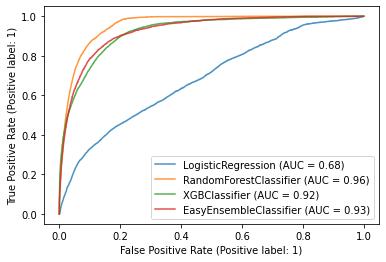

In [70]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()

LR_disp = plot_roc_curve(lr, xTest, yTest, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(rfc, xTest, yTest, ax=ax, alpha=0.8)
xgb_disp = plot_roc_curve(XGB, xTest, yTest, ax=ax, alpha=0.8)
ada_disp = plot_roc_curve(easy, xTest, yTest, ax=ax, alpha=0.8)


plt.show()

### features selection

In [191]:
df["DT_OP_GMT"] = pd.to_datetime(df["DT_OP_GMT"])

start_datetr = '2016-03-01 00:00:00'
end_datetr = '2016-05-31 00:00:00'
start_datets = '2016-06-07 00:00:00'
end_datets = '2016-06-30 00:00:00'

mask_tr = (df['DT_OP_GMT'] >= start_datetr) & (df['DT_OP_GMT'] <= end_datetr)
df_train = df.loc[mask_tr]
print(df_train)

#greater than the start date and smaller than the end date
mask = (df['DT_OP_GMT'] > start_datets) & (df['DT_OP_GMT'] <= end_datets)
df_test = df.loc[mask]
print(df_test)

            ID_OPER  DT_OP_GMT ORA_OP_GMT COD_CANA  COD_CABC  COD_ESITO  \
0        6231261973 2016-03-14   11:27:28      ATM      6011          0   
1        6217512045 2016-03-09   09:48:09      INT      5942          0   
2        6204998318 2016-03-04   12:01:47      INT      5192          0   
3        6260986375 2016-03-25   08:29:03      INT      5968          0   
4        6214969493 2016-03-08   10:36:09      POS      5411          0   
...             ...        ...        ...      ...       ...        ...   
5439283  6442463929 2016-05-30   17:44:10      INT      8999          0   
5439284  6444178850 2016-05-31   09:31:42      INT      4899          0   
5439406  6442771077 2016-05-30   16:54:51      ATM      6011          0   
5439440  6445306054 2016-05-31   15:37:36      INT      7273          0   
5439830  6396976594 2016-05-13   17:07:03      ATM      6011          0   

         PROCESSING_COD  IMP_TRZ_RECON FL_AUTORIZZAZIONE COD_ABC_PAES  ...  \
0                3661

In [192]:
xTrain = df_train[['TIME_ORA_OP','IMP_TRZ_RECON',
       'DEV_MEDIA_IMP_TC_1M', 'DEV_MEDIA_IMP_TC_3M', 'DEV_MEDIA_IMP_TC_6M',
       'DEV_MEDIA_IMP_TC_9M', 'DEV_MEDIA_IMP_TC_12M',
       'PERC_RISK_CIRC_TC_TO_1M', 'PERC_RISK_CIRC_TC_TO_3M',
       'PERC_RISK_CIRC_TC_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_MCC_1M', 'PERC_RISK_MCC_3M',
       'PERC_RISK_MCC_6M', 'PERC_RISK_PAESE_MCC_IM_1M',
       'PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M',
       'DEV_MEDIA_IMP_1M', 'DEV_MEDIA_IMP_3M', 'DEV_MEDIA_IMP_6M',
       'DEV_MEDIA_IMP_9M', 'DEV_MEDIA_IMP_12M', 'FLAG_IMP_PREC_0',
       'FLAG_IMP_PREC_0_AUTOR', 'DEV_IMP_MEDIA_ULTIME_3',
       'DEV_IMP_MEDIA_ULTIME_5', 'TREND_3_5', 'DEV_IMP_MEDIO_TRX_PREC',
       'DEV_IMP_MEDIO_TRX_PREC_MESE', 'DEV_IMP_MEDIO_TRX_PREC_GIORNO',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_CAN_3M', 'DEV_MEDIA_IMP_CAN_6M',
       'DEV_MEDIA_IMP_CAN_9M', 'DEV_MEDIA_IMP_CAN_12M', 'DEV_MEDIA_IMP_TO_1M',
       'DEV_MEDIA_IMP_TO_3M', 'DEV_MEDIA_IMP_TO_6M', 'DEV_MEDIA_IMP_TO_9M',
       'DEV_MEDIA_IMP_TO_12M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'PERC_OPER_NON_AUTOR_M',
       'PERC_OPER_NON_AUTOR_G', 'PERC_VAR_NON_AUTOR_G_1M',
       'PERC_VAR_NON_AUTOR_G_2M', 'PERC_VAR_NON_AUTOR_M_1M',
       'PERC_VAR_NON_AUTOR_M_2M', 'FLAG_CAMBIO_INPUT', 'FLAG_CAMBIO_PAESE_AUT',
       'FLAG_CAMBIO_PAESE_NON_AUT', 'FLAG_CAMBIO_PAESE_AUT_IMP_0',
       'FLAG_CAMBIO_PAESE_NON_AUT_IMP_0', 'PERC_ESITO_NSF_G',
       'PERC_ESITO_NSF_M', 'PERC_ESITO_CV2_G', 'PERC_ESITO_CV2_M',
       'PERC_ESITO_PIN_G', 'PERC_ESITO_PIN_M', 'PERC_ESITO_SCUDO_G',
       'PERC_ESITO_SCUDO_M', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_DT_SCAD_M',
       'PERC_ESITO_ALTRO_G', 'PERC_ESITO_ALTRO_M', 'PERC_ESITO_ALL_G',
       'PERC_ESITO_ALL_M', 'DEV_MEDIA_AUT_SEC_4', 'DEV_MEDIA_AUT_TO_SEC_4',
       'MEDIA_NON_AUT_SEC_4', 'MEDIA_NON_AUT_SEC_3', 'MEDIA_NON_AUT_SEC_2',
       'TIME_NON_AUT_SEC_LAST']]

xTest = df_test[['IMP_TRZ_RECON','TIME_ORA_OP',
       'DEV_MEDIA_IMP_TC_1M', 'DEV_MEDIA_IMP_TC_3M', 'DEV_MEDIA_IMP_TC_6M',
       'DEV_MEDIA_IMP_TC_9M', 'DEV_MEDIA_IMP_TC_12M',
       'PERC_RISK_CIRC_TC_TO_1M', 'PERC_RISK_CIRC_TC_TO_3M',
       'PERC_RISK_CIRC_TC_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_MCC_1M', 'PERC_RISK_MCC_3M',
       'PERC_RISK_MCC_6M', 'PERC_RISK_PAESE_MCC_IM_1M',
       'PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M',
       'DEV_MEDIA_IMP_1M', 'DEV_MEDIA_IMP_3M', 'DEV_MEDIA_IMP_6M',
       'DEV_MEDIA_IMP_9M', 'DEV_MEDIA_IMP_12M', 'FLAG_IMP_PREC_0',
       'FLAG_IMP_PREC_0_AUTOR', 'DEV_IMP_MEDIA_ULTIME_3',
       'DEV_IMP_MEDIA_ULTIME_5', 'TREND_3_5', 'DEV_IMP_MEDIO_TRX_PREC',
       'DEV_IMP_MEDIO_TRX_PREC_MESE', 'DEV_IMP_MEDIO_TRX_PREC_GIORNO',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_CAN_3M', 'DEV_MEDIA_IMP_CAN_6M',
       'DEV_MEDIA_IMP_CAN_9M', 'DEV_MEDIA_IMP_CAN_12M', 'DEV_MEDIA_IMP_TO_1M',
       'DEV_MEDIA_IMP_TO_3M', 'DEV_MEDIA_IMP_TO_6M', 'DEV_MEDIA_IMP_TO_9M',
       'DEV_MEDIA_IMP_TO_12M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'PERC_OPER_NON_AUTOR_M',
       'PERC_OPER_NON_AUTOR_G', 'PERC_VAR_NON_AUTOR_G_1M',
       'PERC_VAR_NON_AUTOR_G_2M', 'PERC_VAR_NON_AUTOR_M_1M',
       'PERC_VAR_NON_AUTOR_M_2M', 'FLAG_CAMBIO_INPUT', 'FLAG_CAMBIO_PAESE_AUT',
       'FLAG_CAMBIO_PAESE_NON_AUT', 'FLAG_CAMBIO_PAESE_AUT_IMP_0',
       'FLAG_CAMBIO_PAESE_NON_AUT_IMP_0', 'PERC_ESITO_NSF_G',
       'PERC_ESITO_NSF_M', 'PERC_ESITO_CV2_G', 'PERC_ESITO_CV2_M',
       'PERC_ESITO_PIN_G', 'PERC_ESITO_PIN_M', 'PERC_ESITO_SCUDO_G',
       'PERC_ESITO_SCUDO_M', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_DT_SCAD_M',
       'PERC_ESITO_ALTRO_G', 'PERC_ESITO_ALTRO_M', 'PERC_ESITO_ALL_G',
       'PERC_ESITO_ALL_M', 'DEV_MEDIA_AUT_SEC_4', 'DEV_MEDIA_AUT_TO_SEC_4',
       'MEDIA_NON_AUT_SEC_4', 'MEDIA_NON_AUT_SEC_3', 'MEDIA_NON_AUT_SEC_2',
       'TIME_NON_AUT_SEC_LAST']]

yTrain = df_train["FLAG_FRODE"]

yTest = df_test["FLAG_FRODE"]

MemoryError: Unable to allocate 2.32 GiB for an array with shape (69, 4505227) and data type float64

In [213]:
# Feature Importance with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(xTrain, yTrain)

ExtraTreesClassifier(n_estimators=10)

In [214]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=xTrain.columns)
feat_importances.nlargest(30).index


[0.00568563 0.00649897 0.00586601 0.00693795 0.00660063 0.00973231
 0.00872721 0.00557556 0.00514165 0.00517014 0.00517266 0.00570453
 0.12470506 0.07047981 0.0627541  0.00655976 0.00579774 0.00620316
 0.08992646 0.05593147 0.08398833 0.008477   0.03451525 0.01218808
 0.01772133 0.04880661 0.02546569 0.00391989 0.00389297 0.00407643
 0.00410889 0.0043339  0.00381625 0.00195642 0.00341938 0.00344038
 0.00497984 0.00372339 0.00357847 0.00355005 0.00462379 0.004042
 0.00419067 0.00464297 0.0041836  0.00560103 0.00483239 0.00428749
 0.00416433 0.00440001 0.00729816 0.00519469 0.00393754 0.00312565
 0.00516055 0.00424656 0.00397266 0.00478011 0.00702954 0.01622
 0.04349677 0.01405859 0.00490809 0.00331054 0.00375911 0.00025687
 0.00140693 0.0004051  0.00094784 0.00027336 0.00140067 0.00031776
 0.00137168 0.00016434 0.00104359 0.00389647 0.00394327 0.00415723
 0.00381677 0.00486246 0.0046038  0.00455144 0.00798424]


Index(['PERC_RISK_CIRC_TC_TO_1M', 'PERC_RISK_PAESE_CAN_IM_1M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_CIRC_TC_TO_3M',
       'PERC_RISK_CIRC_TC_TO_6M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_PAESE_MCC_IM_3M', 'FLAG_CAMBIO_PAESE_NON_AUT',
       'PERC_RISK_MCC_3M', 'PERC_RISK_PAESE_MCC_IM_6M',
       'PERC_RISK_PAESE_MCC_IM_1M', 'FLAG_CAMBIO_PAESE_AUT',
       'FLAG_CAMBIO_PAESE_AUT_IMP_0', 'PERC_RISK_MCC_6M', 'Row_Num',
       'TIME_ORA_OP', 'PERC_RISK_MCC_1M', 'TIME_NON_AUT_SEC_LAST',
       'PERC_OPER_NON_AUTOR_1M', 'FLAG_CAMBIO_INPUT', 'ID_TIPO_CARTA',
       'ID_CARTA', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M', 'PROCESSING_COD',
       'DEV_MEDIA_IMP_CIRC_TC_TO_6M', 'IMP_TRZ_RECON',
       'DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_TC_12M', 'COD_ESITO',
       'DEV_MEDIA_IMP_TO_1M'],
      dtype='object')

In [215]:
# Number of data points in the minority class
df_train = df_train.reset_index()
number_records_fraud = len(df_train[df_train.FLAG_FRODE == 1])
fraud_indices = np.array(df_train[df_train.FLAG_FRODE == 1].index)

In [216]:
# Picking the indices of the normal classes
normal_indices = df_train[df_train.FLAG_FRODE == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dfset
df_train_undersample = df_train.iloc[under_sample_indices,:]

#X_undersample = under_sample_df.loc[:, under_sample_df.columns != 'FLAG_FRODE']
#y_undersample = under_sample_df.loc[:, under_sample_df.columns == 'FLAG_FRODE']

In [77]:
df_train_undersample

,index,ID_OPER,DT_OP_GMT,ORA_OP_GMT,COD_CANA,COD_CABC,COD_ESITO,PROCESSING_COD,IMP_TRZ_RECON,FL_AUTORIZZAZIONE,...,PERC_ESITO_ALL_G,PERC_ESITO_ALL_M,DEV_MEDIA_AUT_SEC_4,DEV_MEDIA_AUT_TO_SEC_4,MEDIA_NON_AUT_SEC_4,MEDIA_NON_AUT_SEC_3,MEDIA_NON_AUT_SEC_2,TIME_NON_AUT_SEC_LAST,ANNO,MESE
36,38,6226002651,2016-03-12,09:16:37,INT,7399,60,360000,0.00,T,...,0.0,0.000000,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.0,1440090,2016,3
38,40,6251120205,2016-03-21,16:55:41,INT,5968,0,0,13.42,T,...,0.0,0.000000,0.061449,0.000000,0.000000e+00,0.000000e+00,0.0,2503645,2016,3
60,71,6277642583,2016-03-31,19:43:54,INT,5499,0,6300,1.00,T,...,0.0,0.000000,2.039607,2.104925,0.000000e+00,0.000000e+00,0.0,1677275,2016,3
101,112,6197847455,2016-03-02,01:47:32,INT,7995,0,116300,100.00,T,...,0.0,0.000000,2052.826531,2052.826531,0.000000e+00,0.000000e+00,0.0,49,2016,3
102,113,6197847677,2016-03-02,01:46:43,INT,7995,0,116300,100.00,T,...,0.0,0.000000,1057.342105,1057.342105,0.000000e+00,0.000000e+00,0.0,190,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988231,2389512,6303791988,2016-04-10,08:27:48,POS,5661,0,0,64.48,T,...,0.0,0.000000,-0.606107,0.000000,0.000000e+00,0.000000e+00,0.0,440488,2016,4
4054322,4885422,6382160857,2016-05-08,16:33:51,ATM,6011,0,16100,20.00,T,...,0.0,0.000000,1.284501,-0.430780,0.000000e+00,0.000000e+00,0.0,29079,2016,5
2302791,2769201,6275671619,2016-03-31,09:02:33,INT,5968,0,0,1.00,T,...,0.0,0.181818,-0.942275,-0.942275,2.566450e+05,6.271000e+03,9357.5,395272,2016,3
3038432,3658136,6335694673,2016-04-22,06:46:55,ATM,6011,0,16100,150.00,T,...,0.0,0.000000,-0.455717,1.292482,2.677164e+06,2.677164e+06,4015728.0,61647,2016,4


In [217]:
xTrain = df_train_undersample[['PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M', 'TIME_ORA_OP',
       'PERC_RISK_PAESE_MCC_IM_1M', 'PERC_RISK_MCC_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_CIRC_TC_TO_6M',
       'PERC_OPER_NON_AUTOR_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_CIRC_TC_TO_3M', 'MEDIA_NON_AUT_SEC_4', 'PERC_RISK_MCC_3M',
       'DEV_MEDIA_IMP_TC_1M', 'MEDIA_NON_AUT_SEC_2', 'PERC_RISK_MCC_1M',
       'IMP_TRZ_RECON', 'DEV_MEDIA_IMP_TO_12M', 'PERC_OPER_NON_AUTOR_2M',
       'DEV_MEDIA_IMP_CAN_12M', 'MEDIA_NON_AUT_SEC_3', 'DEV_MEDIA_IMP_9M',
       'DEV_MEDIA_IMP_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_IMP_MEDIO_TRX_PREC', 'DEV_MEDIA_IMP_12M', 'DEV_MEDIA_IMP_CAN_3M',
       'DEV_MEDIA_IMP_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_3M']].values

xTest = df_test[['PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M', 'TIME_ORA_OP',
       'PERC_RISK_PAESE_MCC_IM_1M', 'PERC_RISK_MCC_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_CIRC_TC_TO_6M',
       'PERC_OPER_NON_AUTOR_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_CIRC_TC_TO_3M', 'MEDIA_NON_AUT_SEC_4', 'PERC_RISK_MCC_3M',
       'DEV_MEDIA_IMP_TC_1M', 'MEDIA_NON_AUT_SEC_2', 'PERC_RISK_MCC_1M',
       'IMP_TRZ_RECON', 'DEV_MEDIA_IMP_TO_12M', 'PERC_OPER_NON_AUTOR_2M',
       'DEV_MEDIA_IMP_CAN_12M', 'MEDIA_NON_AUT_SEC_3', 'DEV_MEDIA_IMP_9M',
       'DEV_MEDIA_IMP_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_IMP_MEDIO_TRX_PREC', 'DEV_MEDIA_IMP_12M', 'DEV_MEDIA_IMP_CAN_3M',
       'DEV_MEDIA_IMP_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_3M']].values

yTrain = df_train_undersample["FLAG_FRODE"].values

yTest = df_test["FLAG_FRODE"].values

In [218]:
lr = LogisticRegression(random_state = 0, solver = 'liblinear', C= 1.0, penalty = 'l2',
                       n_jobs = -1)
lr.fit(xTrain,yTrain)
predictions_lr = lr.predict(xTest)
print(confusion_matrix(yTest, predictions_lr))

c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1357: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[[582072 125632]
 [  3493   3426]]


In [219]:
import numpy as np
cm_lr = confusion_matrix(yTest, predictions_lr)

tn = cm_lr[0][0]
fp = cm_lr[0][1]
fn = cm_lr[1][0]
tp = cm_lr[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_lr) 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_lr) 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )
precision = precision_score(yTest, predictions_lr) 
print("The precision Score is {}".format(precision)) 


roc_auc = roc_auc_score(yTest, predictions_lr) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_lr) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.8193103216661093
The Recall is 0.4951582598641422
Specificity 0.8224794546872704
The F1 Score is 0.05039087492737742
Precision:  0.026546204032295555
The precision Score is 0.026546204032295555
The ROC AUC Score is 0.6588188572757062
The Average precision Score is 0.01803246413205709
G-Mean 0.6381672943335136


In [220]:
#For XGB
# Make predictions on validation dataset
XGB = XGBClassifier(random_state=0,n_jobs=-1,use_label_encoder =False, eval_metric = 'logloss',
                   max_depth = 10, n_estimators = 300)
XGB.fit(xTrain,yTrain)
predictions_xgb = XGB.predict(xTest)
print(confusion_matrix(yTest, predictions_xgb))

[[565477 142227]
 [  1161   5758]]


In [82]:
cm_xgb = confusion_matrix(yTest, predictions_xgb)

tn = cm_xgb[0][0]
fp = cm_xgb[0][1]
fn = cm_xgb[1][0]
tp = cm_xgb[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_xgb) 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_xgb) 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )
precision = precision_score(yTest, predictions_xgb) 
print("The precision Score is {}".format(precision)) 


roc_auc = roc_auc_score(yTest, predictions_xgb) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_xgb) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.790922094235541
The Recall is 0.8376337319068596
Specificity 0.7905011696320975
The F1 Score is 0.06677955471934777
Precision:  0.03477601996159223
The precision Score is 0.03477601996159223
The ROC AUC Score is 0.8140674507694786
The Average precision Score is 0.030579604334757066
G-Mean 0.813726271417896


In [221]:
#building the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(bootstrap = True, random_state=0,
                             max_features = 2, max_depth = 14, n_estimators = 200)
rfc.fit(xTrain,yTrain)
predictions = rfc.predict(xTest)

print(confusion_matrix(yTest, predictions))

0.8514643385393417
[[602047 105657]
 [   490   6429]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92    707704
           1       0.06      0.93      0.11      6919

    accuracy                           0.85    714623
   macro avg       0.53      0.89      0.51    714623
weighted avg       0.99      0.85      0.91    714623



In [117]:
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# Change thresholds 

In [128]:
from sklearn.metrics import precision_recall_curve
# predict probabilities
rfc_probs = rfc.predict_proba(xTest)
predict_rfc = (rfc_probs[:,1] > 0.5).astype(int)
print(confusion_matrix(yTest, predict_rfc))

[[601038 104312]
 [   429   5927]]


In [84]:
cm = confusion_matrix(yTest, predictions)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions, average='weighted') 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions, average='weighted') 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.8528310847456675
The Recall is 0.8528310847456675
Specificity 0.8521131353228893
The F1 Score is 0.9125433913065869
Precision:  0.053765001496747976
The ROC AUC Score is 0.8923089276362716
The Average precision Score is 0.05073889465319252
G-Mean 0.852472034452422


In [222]:
#For easy
# Make predictions on validation dataset
easy = EasyEnsembleClassifier(random_state=0)
easy.fit(xTrain,yTrain)
predictions_easy = easy.predict(xTest)

print(confusion_matrix(yTest, predictions_easy))

0.6097886577957888
[[429433 278271]
 [   583   6336]]
              precision    recall  f1-score   support

           0       1.00      0.61      0.75    707704
           1       0.02      0.92      0.04      6919

    accuracy                           0.61    714623
   macro avg       0.51      0.76      0.40    714623
weighted avg       0.99      0.61      0.75    714623



In [224]:
cm = confusion_matrix(yTest, predictions_easy)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_easy, average='weighted') 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_easy, average='weighted') 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions_easy) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_easy) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.6097886577957888
The Recall is 0.6097886577957887
Specificity 0.6067974746504188
The F1 Score is 0.7480129137759197
Precision:  0.022262277456281822
The ROC AUC Score is 0.761268371665432
The Average precision Score is 0.021202256449241213
G-Mean 0.6082912276376776


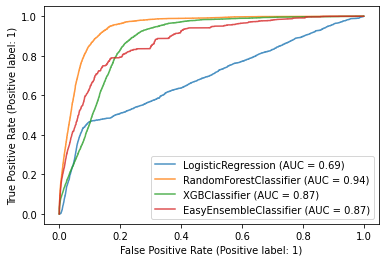

In [223]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()

LR_disp = plot_roc_curve(lr, xTest, yTest, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(rfc, xTest, yTest, ax=ax, alpha=0.8)
xgb_disp = plot_roc_curve(XGB, xTest, yTest, ax=ax, alpha=0.8)
ada_disp = plot_roc_curve(easy, xTest, yTest, ax=ax, alpha=0.8)


plt.show()

# Thresholds RF

In [111]:
from sklearn.metrics import precision_recall_curve
# predict probabilities
rfc_probs = rfc.predict_proba(xTest)
rfc_probs

array([[0.12392174, 0.87607826],
       [0.82888776, 0.17111224],
       [0.86581986, 0.13418014],
       ...,
       [0.91229877, 0.08770123],
       [0.91227919, 0.08772081],
       [0.90323238, 0.09676762]])

In [115]:
from sklearn.metrics import f1_score
from numpy import arange, argmax

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

probs = rfc_probs[:,1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [roc_auc_score(yTest, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, ROC AUC=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.477, ROC AUC=0.89331


In [ ]:
from sklearn.metrics import precision_recall_curve
# predict probabilities
rfc_probs = rfc.predict_proba(xTest)
predict_rfc = (rfc_probs[:,1] > 0.5).astype(int)
print(confusion_matrix(yTest, predict_rfc))

In [135]:
cm = confusion_matrix(yTest, predict_rfc)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions, average='weighted') 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions, average='weighted') 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.8528310847456675
The Recall is 0.8528310847456675
Specificity 0.8521131353228893
The F1 Score is 0.9125433913065869
Precision:  0.053765001496747976
The ROC AUC Score is 0.8923089276362716
The Average precision Score is 0.05073889465319252
G-Mean 0.852472034452422


# XGB

In [133]:
# predict probabilities
xgb_probs = XGB.predict_proba(xTest)


In [131]:
from sklearn.metrics import f1_score
from numpy import arange, argmax

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

xgb_prob = xgb_probs[:,1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [roc_auc_score(yTest, to_labels(xgb_prob, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, ROC AUC=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.397, ROC AUC=0.81904


In [134]:
predict_xgb = (xgb_probs[:,1] > 0.397).astype(int)
print(confusion_matrix(yTest, predict_xgb))

[[541070 164280]
 [   820   5536]]


In [109]:
from sklearn.metrics import f1_score
from numpy import arange, argmax

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

probs = rfc_probs[:,1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(yTest, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, ROC AUC=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.854, TOC AUC=0.21514


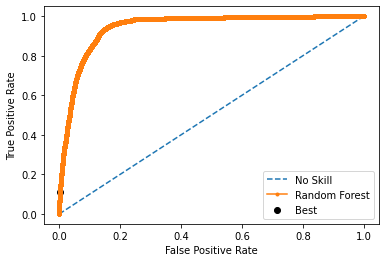

In [110]:
from matplotlib import pyplot

fpr, tpr, threshold = roc_curve(yTest, probs)
roc_auc = auc(fpr, tpr)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# Hybrid

In [169]:
df["DT_OP_GMT"] = pd.to_datetime(df["DT_OP_GMT"])

start_datetr = '2016-03-01 00:00:00'
end_datetr = '2016-05-31 00:00:00'
start_datets = '2016-06-07 00:00:00'
end_datets = '2016-06-30 00:00:00'

mask_tr = (df['DT_OP_GMT'] >= start_datetr) & (df['DT_OP_GMT'] < end_datetr)
df_train = df.loc[mask_tr]
print(df_train)

mask = (df['DT_OP_GMT'] >= start_datets) & (df['DT_OP_GMT'] < end_datets)
df_test = df.loc[mask]
print(df_test)

            ID_OPER  DT_OP_GMT ORA_OP_GMT COD_CANA  COD_CABC  COD_ESITO  \
0        6231261973 2016-03-14   11:27:28      ATM      6011          0   
1        6217512045 2016-03-09   09:48:09      INT      5942          0   
2        6204998318 2016-03-04   12:01:47      INT      5192          0   
3        6260986375 2016-03-25   08:29:03      INT      5968          0   
4        6214969493 2016-03-08   10:36:09      POS      5411          0   
...             ...        ...        ...      ...       ...        ...   
5438812  6443141702 2016-05-30   19:07:33      INT      7273          0   
5439277  6442518610 2016-05-30   15:57:05      INT      5045          0   
5439283  6442463929 2016-05-30   17:44:10      INT      8999          0   
5439406  6442771077 2016-05-30   16:54:51      ATM      6011          0   
5439830  6396976594 2016-05-13   17:07:03      ATM      6011          0   

         PROCESSING_COD  IMP_TRZ_RECON FL_AUTORIZZAZIONE COD_ABC_PAES  ...  \
0                3661

In [170]:
xTrain = df_train[['PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M', 'TIME_ORA_OP',
       'PERC_RISK_PAESE_MCC_IM_1M', 'PERC_RISK_MCC_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_CIRC_TC_TO_6M',
       'PERC_OPER_NON_AUTOR_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_CIRC_TC_TO_3M', 'MEDIA_NON_AUT_SEC_4', 'PERC_RISK_MCC_3M',
       'DEV_MEDIA_IMP_TC_1M', 'MEDIA_NON_AUT_SEC_2', 'PERC_RISK_MCC_1M',
       'IMP_TRZ_RECON', 'DEV_MEDIA_IMP_TO_12M', 'PERC_OPER_NON_AUTOR_2M',
       'DEV_MEDIA_IMP_CAN_12M', 'MEDIA_NON_AUT_SEC_3', 'DEV_MEDIA_IMP_9M',
       'DEV_MEDIA_IMP_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_IMP_MEDIO_TRX_PREC', 'DEV_MEDIA_IMP_12M', 'DEV_MEDIA_IMP_CAN_3M',
       'DEV_MEDIA_IMP_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_3M']].values

xTest = df_test[['PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M', 'TIME_ORA_OP',
       'PERC_RISK_PAESE_MCC_IM_1M', 'PERC_RISK_MCC_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_CIRC_TC_TO_6M',
       'PERC_OPER_NON_AUTOR_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_CIRC_TC_TO_3M', 'MEDIA_NON_AUT_SEC_4', 'PERC_RISK_MCC_3M',
       'DEV_MEDIA_IMP_TC_1M', 'MEDIA_NON_AUT_SEC_2', 'PERC_RISK_MCC_1M',
       'IMP_TRZ_RECON', 'DEV_MEDIA_IMP_TO_12M', 'PERC_OPER_NON_AUTOR_2M',
       'DEV_MEDIA_IMP_CAN_12M', 'MEDIA_NON_AUT_SEC_3', 'DEV_MEDIA_IMP_9M',
       'DEV_MEDIA_IMP_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_IMP_MEDIO_TRX_PREC', 'DEV_MEDIA_IMP_12M', 'DEV_MEDIA_IMP_CAN_3M',
       'DEV_MEDIA_IMP_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_3M']].values

yTrain = df_train["FLAG_FRODE"].values

yTest = df_test["FLAG_FRODE"].values

In [ ]:
Xsmote, ysmote = SMOTE(sampling_strategy=1).fit_resample(xTrain, yTrain)
colonna = ['FLAG_FRODE']
oversampled_df_train = pd.concat([pd.DataFrame(ysmote, columns = colonna),pd.DataFrame(Xsmote)], axis=1)
df_test = pd.concat([pd.DataFrame(yTest, columns = colonna),pd.DataFrame(xTest)], axis=1)

#smote_prediction = smote_model.predict(X_test)
#smote_prediction

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(yTrain)))
print("SMOTE data distribution: {}".format(Counter(ysmote)))

### SMOTE

In [172]:
# build model with SMOTE imblearn

Xsmote, ysmote = SMOTE(sampling_strategy=0.1).fit_resample(xTrain, yTrain)
colonna = ['FLAG_FRODE']
oversampled_df_train = pd.concat([pd.DataFrame(ysmote, columns = colonna),pd.DataFrame(Xsmote)], axis=1)
df_test = pd.concat([pd.DataFrame(yTest, columns = colonna),pd.DataFrame(xTest)], axis=1)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(yTrain)))
print("SMOTE data distribution: {}".format(Counter(ysmote)))

normal data distribution: Counter({0: 4424485, 1: 38362})
SMOTE data distribution: Counter({0: 4424485, 1: 442448})


In [189]:
oversampled_df_train

,FLAG_FRODE,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,0,0.000594,0.000642,11.000000,0.000404,0.038547,0.000404,0.000101,0.000642,0.000189,...,0.000000,3.764000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0.000270,0.000189,9.000000,0.000202,0.015064,0.085018,0.001415,0.084003,0.000944,...,0.178377,1.411049e+06,0.641533,0.751159,0.526389,0.758037,0.352347,1.035722,1.277540,0.712525
2,0,0.000000,0.000076,12.000000,0.000000,0.001095,0.085018,0.001415,0.084003,0.000944,...,-0.384479,1.411049e+06,-0.142551,-0.085289,-0.202696,-0.086802,-0.293606,0.063352,0.189665,-0.105469
3,0,0.000054,0.000038,8.000000,0.000101,0.013441,0.004145,0.001415,0.003889,0.000944,...,0.102885,1.411049e+06,0.536370,0.638972,0.428603,0.605995,0.265710,0.905305,1.131632,0.602813
4,0,0.000000,0.000000,10.000000,0.000000,0.004984,0.000000,0.000000,0.000378,0.000000,...,-0.320658,2.573075e+06,0.271148,-0.271873,-0.137945,0.261527,0.312880,-0.313153,-0.313153,-0.153672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866928,1,0.000764,0.001124,9.753120,0.000791,0.023769,0.035364,0.226194,0.125342,0.224018,...,4.906104,4.325346e+05,11.175747,0.732865,3.213979,11.149170,11.837477,-0.703989,-0.569249,3.224070
4866929,1,0.113442,0.104750,5.103948,0.132198,0.128627,0.401529,0.238363,0.341398,0.193026,...,3.145597,0.000000e+00,6.281760,3.782449,2.750720,3.376952,3.988805,1.158909,3.262262,2.777640
4866930,1,0.004344,0.003241,15.813212,0.005405,0.019391,0.035258,0.207845,0.095762,0.216786,...,15.845678,8.116667e+02,19.075624,25.119932,12.466567,18.095891,20.960380,5.680508,57.056779,12.656285
4866931,1,0.002109,0.001847,18.032054,0.002730,0.001867,0.416574,0.033823,0.304199,0.181525,...,0.026776,0.000000e+00,0.081477,0.071055,0.381855,0.099032,0.275214,0.083030,0.473990,0.431470


### UNDERSAMPLE

In [173]:
# Number of data points in the minority class
df_train = oversampled_df_train.reset_index()
number_records_fraud = len(df_train[df_train.FLAG_FRODE == 1])
fraud_indices = np.array(df_train[df_train.FLAG_FRODE == 1].index)

In [174]:
# Picking the indices of the normal classes
normal_indices = df_train[df_train.FLAG_FRODE == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dfset
df_train_undersample = df_train.iloc[under_sample_indices,:]

#X_undersample = under_sample_df.loc[:, under_sample_df.columns != 'FLAG_FRODE']
#y_undersample = under_sample_df.loc[:, under_sample_df.columns == 'FLAG_FRODE']

In [179]:
df_train_undersample.columns

Index([     'index', 'FLAG_FRODE',            0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29],
      dtype='object')

In [180]:
xTrain = df_train_undersample[[0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29]].values

xTest = df_test[[0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29]].values

In [176]:
yTrain = df_train_undersample["FLAG_FRODE"].values

yTest = df_test["FLAG_FRODE"].values

In [182]:
#For XGB
# Make predictions on validation dataset
XGB = XGBClassifier(random_state=0,n_jobs=-1,use_label_encoder =False, eval_metric = 'logloss',
                   max_depth = 10, n_estimators = 300)
XGB.fit(xTrain,yTrain)
predictions_xgb = XGB.predict(xTest)
print(confusion_matrix(yTest, predictions_xgb))

[[342743 362607]
 [   369   5987]]


In [187]:
#building the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(bootstrap = True, random_state=0,
                             max_features = 2, max_depth = 14, n_estimators = 200)
rfc.fit(xTrain,yTrain)
predictions = rfc.predict(xTest)
print(accuracy_score(yTest, predictions))
print(confusion_matrix(yTest, predictions))
print(classification_report(yTest, predictions))

0.5541951311356094
[[388502 316848]
 [   434   5922]]
              precision    recall  f1-score   support

           0       1.00      0.55      0.71    705350
           1       0.02      0.93      0.04      6356

    accuracy                           0.55    711706
   macro avg       0.51      0.74      0.37    711706
weighted avg       0.99      0.55      0.70    711706



In [188]:
cm = confusion_matrix(yTest, predictions)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions, average='weighted') 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions, average='weighted') 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.5541951311356094
The Recall is 0.5541951311356094
Specificity 0.5507932232225137
The F1 Score is 0.7040358080947591
Precision:  0.018347430058555627
The ROC AUC Score is 0.7412556424482613
The Average precision Score is 0.017704434333068255
G-Mean 0.5524915588245723
